## 1) Import packages and dataset

In [2]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [3]:
# load data

df_raw = pd.read_csv('drug_consumption.csv')
df_raw

df_raw.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [24]:
df_raw.Education.value_counts()

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64

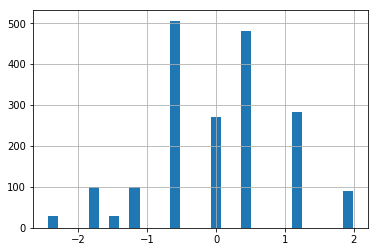

In [25]:
df_raw.Education.hist(bins=30)

## 2) Data exploration...

In [11]:
df.ID.unique().shape[0] == df.shape[0]

True

In [45]:
df.Ethnicity.value_counts() #.sort_index()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
-0.22166      20
 0.12600      20
 1.90725       3
Name: Ethnicity, dtype: int64

In [43]:
df.Age.value_counts().sort_index()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

In [47]:
df.Country.value_counts()

 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64

## 3) Data preparation for modeling

In [70]:
# Definition 1:
# CL0	Never Used
# CL1	Used over a Decade Ago
#--------------------
# CL2	Used in Last Decade
# CL3	Used in Last Year
# CL4	Used in Last Month
# CL5	Used in Last Week
# CL6	Used in Last Day

df1 = df_raw.iloc[:,1:13].copy()

Cannabis_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Cannabis], name='Cannabis')
Ecstasy_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Ecstasy], name='Ecstasy')
Heroin_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Heroin], name='Heroin')

df1 = pd.concat([df1, Cannabis_1, Ecstasy_1, Heroin_1], axis=1)
df1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Ecstasy,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


In [71]:
# Definition 2:
# CL0	Never Used
# CL1	Used over a Decade Ago
# CL2	Used in Last Decade
#--------------------
# CL3	Used in Last Year
# CL4	Used in Last Month
# CL5	Used in Last Week
# CL6	Used in Last Day

df2 = df_raw.iloc[:,1:13].copy()

Cannabis_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Cannabis], name='Cannabis')
Ecstasy_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Ecstasy], name='Ecstasy')
Heroin_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Heroin], name='Heroin')

df2 = pd.concat([df2, Cannabis_2, Ecstasy_2, Heroin_2], axis=1)
df2.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Ecstasy,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


## Modeling

In [74]:
# prepare data for modeling

df = df1.copy()
drug = 'Cannabis'

X = df.iloc[:,:12]
y = df[drug]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [86]:
# select different models

# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models and configure classifiers
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()

In [156]:
# Collect results on the learners
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_eval_classifier(clf, X_train, X_test, y_train, y_test):
     
    eval_metrics = {}
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    #eval_metrics['cm'] = confusion_matrix(y_test, y_pred).ravel()
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['f1_score'] = f1_score(y_test, y_pred)
    
    return eval_metrics

In [157]:
knn_metrics = fit_eval_classifier(knn, X_train, X_test, y_train, y_test)
knn_metrics

{'acc': 0.7796610169491526,
 'recall': 0.8466453674121406,
 'precision': 0.8255451713395638,
 'f1_score': 0.83596214511041}

In [139]:
eval_df = pd.DataFrame()

for clf in [rf, knn, nb, svm, ada]:
    
    eval_metrics = fit_eval_classifier(clf, X_train, X_test, y_train, y_test)
    eval_df = eval_df.join(pd.DataFrame(eval_metrics, index=clf.__class__.__name__))

eval_metrics

TypeError: Index(...) must be called with a collection of some kind, 'RandomForestClassifier' was passed

/Users/kacha/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


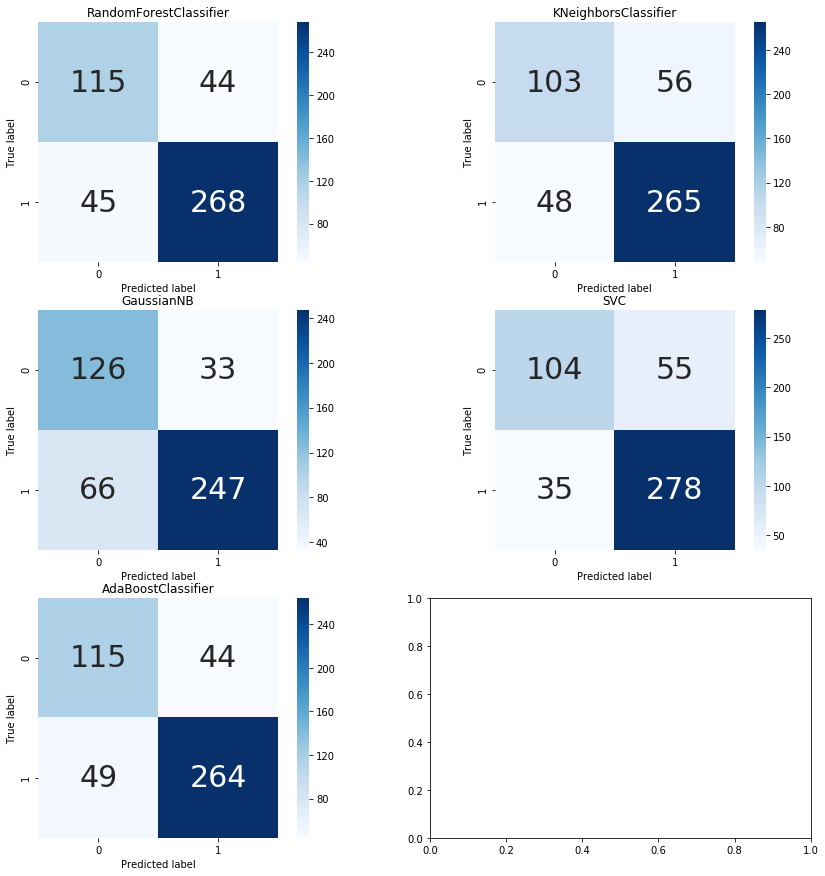

In [98]:
plt.subplots(3,2, figsize=(15,15))

cm_results = {}

for i, clf in enumerate([rf, knn, nb, svm, ada], start=1):
    plt.subplot(3,2,i)
    cm_results[clf.__class__.__name__], acc = model_classifier(clf, X_train, X_test, y_train, y_test)

    #fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
                cmap='Blues', square=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(clf.__class__.__name__);
    

In [106]:
tn

115

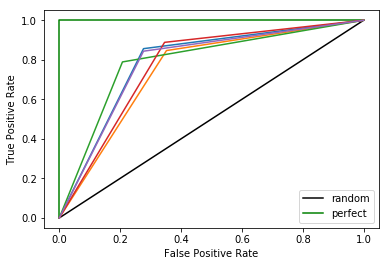

In [109]:
from sklearn.metrics import roc_curve

plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')

for i, clf in enumerate([rf, knn, nb, svm, ada], start=1):
    
    fpr, tpr, thresholds_RF = roc_curve(y_test, clf.predict(X_test))

    #tn, fp, fn, tp = cm_results[clf.__class__.__name__].ravel()
    plt.plot(fpr, tpr)  #,'r-',label = 'RF AUC: %.3f'%auc_RF)   
    
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)




In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

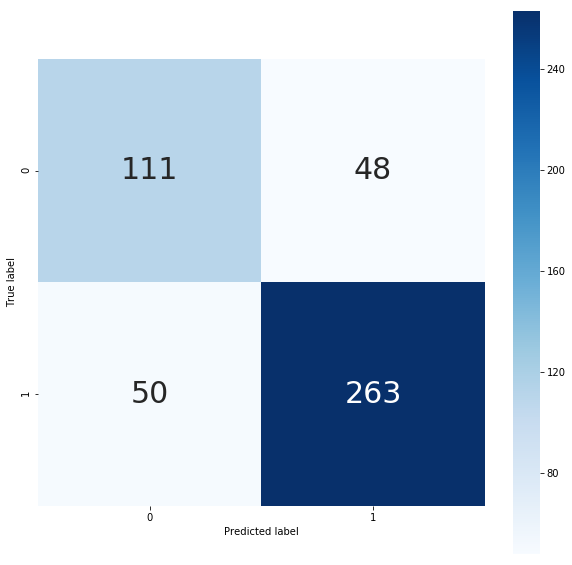

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [63]:
dt2 = DecisionTreeClassifier(random_state=0, max_depth=3)
dt2.fit(X_train,y_train)
#y_pred = dt.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [64]:
#import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(dt2, out_file ='tree2.dot') 

In [65]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=400']);

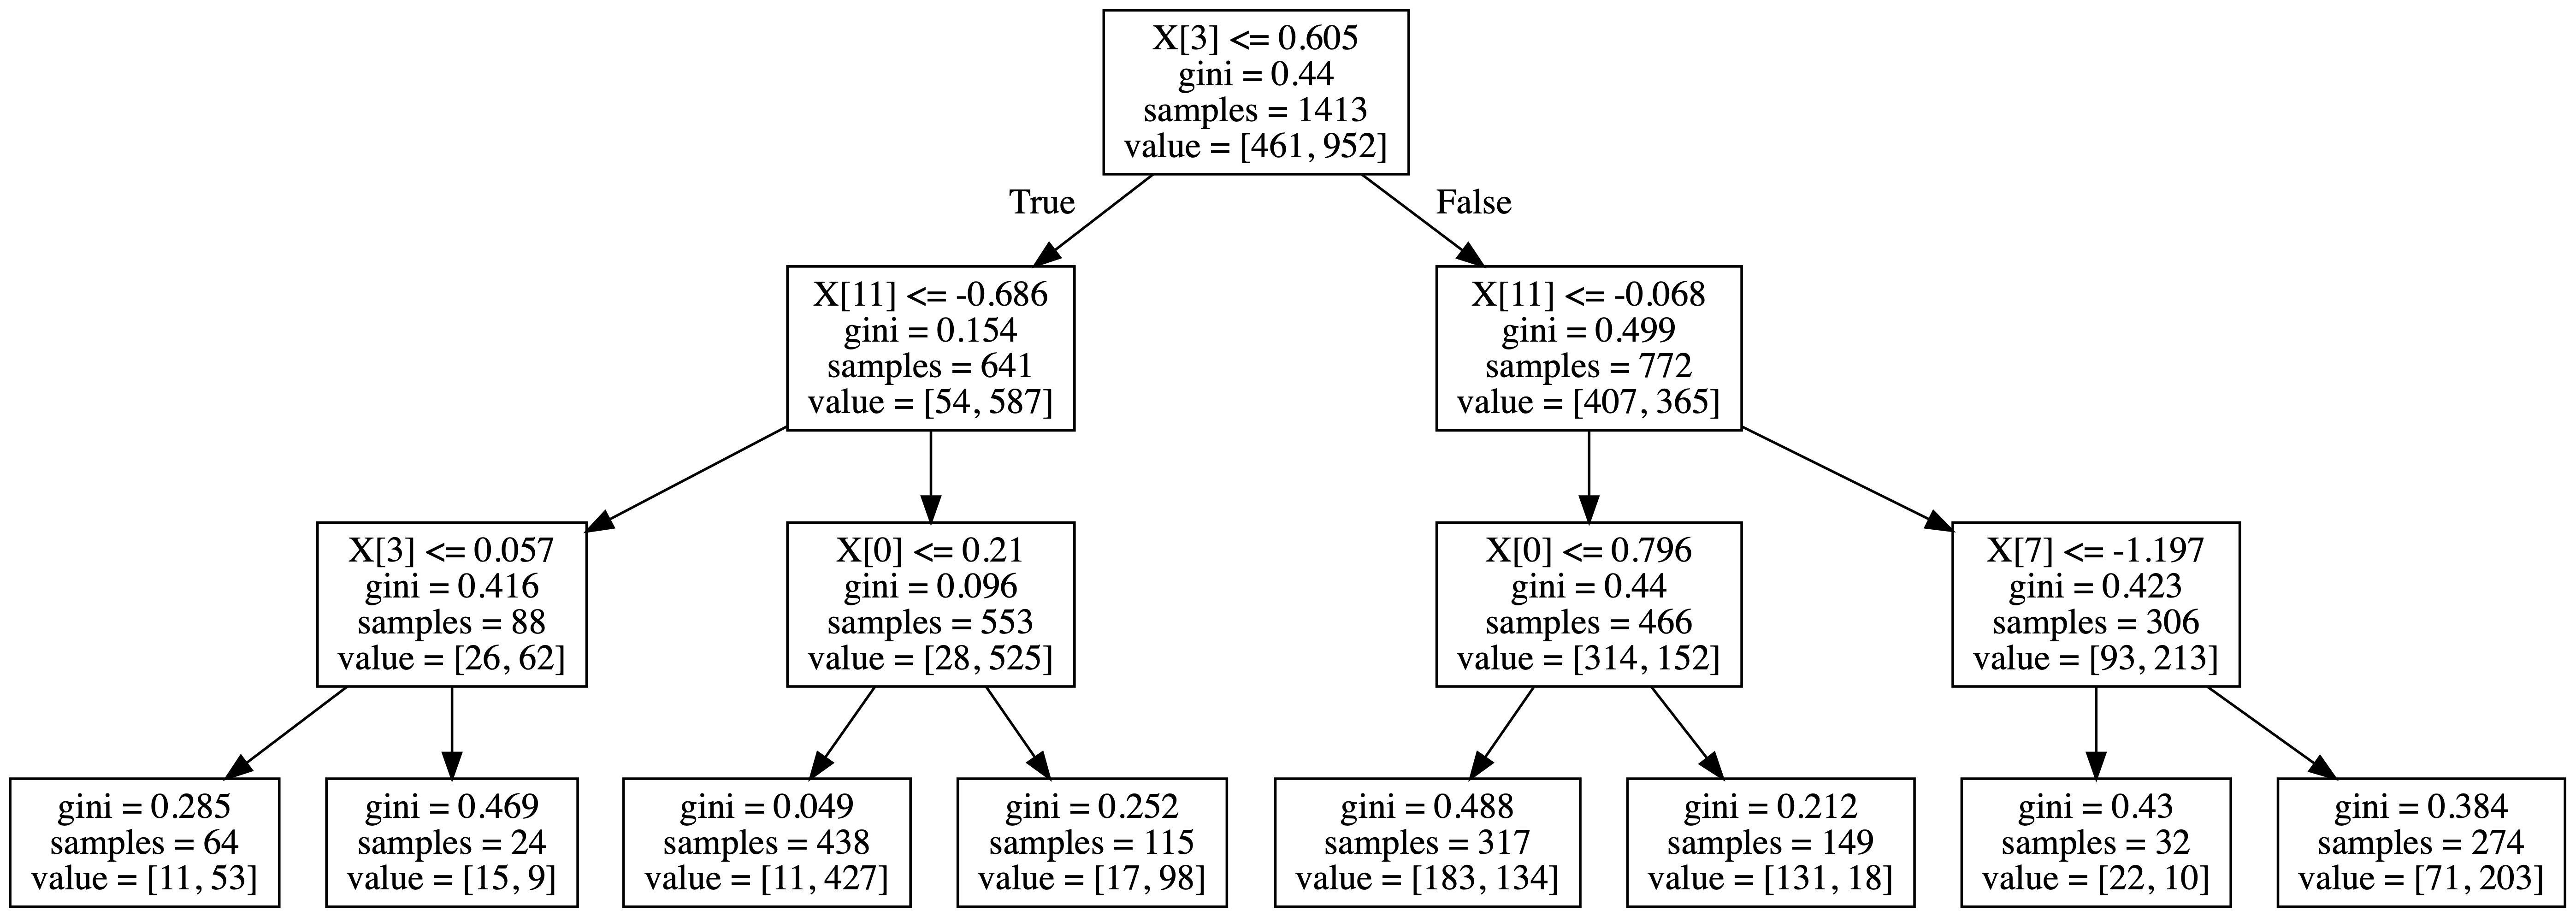

In [66]:
from IPython.display import Image
Image('tree2.png')